# Agglomerartive Clustering Implemetation

## Loading Python Libraries - Customer Segmentation

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

## Data Loading 

In [29]:
data=pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [30]:
data = data.drop(['CUST_ID'],axis=1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Prerpocessing

### 1. Data Cleaning

In [31]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:>

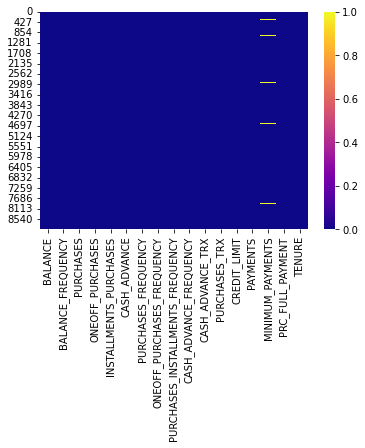

In [32]:
sns.heatmap(data.isnull(),cmap='plasma')

In [33]:
data.shape

(8950, 17)

In [34]:
data = data.dropna()

In [35]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

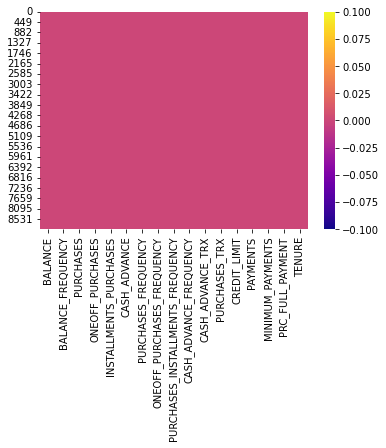

In [36]:
sns.heatmap(data.isnull(),cmap='plasma')

In [37]:
data.shape

(8636, 17)

### 2. Data Integration and Transformation

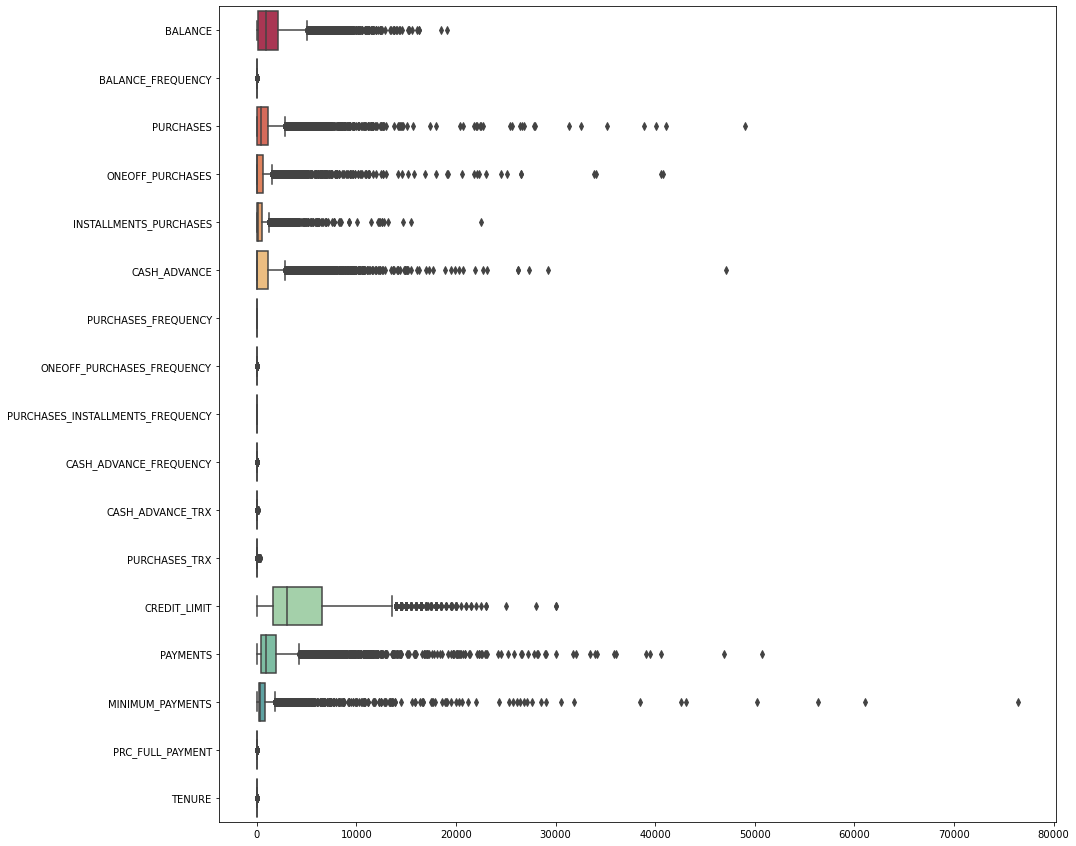

In [38]:
plt.figure(figsize=(15,15))
sns.boxplot(data=data,orient="h",palette='Spectral')
plt.show()

In [39]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data)
x_normalized = normalize(x_scaled)
x_normalized = pd.DataFrame(x_normalized)
x_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311806,-0.154954,-0.179717,-0.150396,-0.148581,-0.196246,-0.343691,-0.287374,-0.300313,-0.285562,-0.200761,-0.216751,-0.403071,-0.227772,-0.127929,-0.225169,0.148729
1,0.215652,0.019100,-0.133545,-0.101359,-0.129489,0.724875,-0.348852,-0.193676,-0.261474,0.157198,0.028012,-0.168495,0.191114,0.224880,0.024747,0.059936,0.100236
2,0.121694,0.144174,-0.033208,0.028501,-0.130890,-0.133690,0.358313,0.754993,-0.264303,-0.194536,-0.136766,-0.034365,0.232162,-0.113964,-0.028500,-0.153394,0.101320
3,-0.156537,0.211587,-0.195017,-0.146385,-0.192092,-0.196202,-0.430561,-0.171033,-0.387886,-0.285498,-0.200715,-0.233329,-0.380097,-0.159155,-0.109322,-0.225118,0.148696
4,0.045686,0.231939,0.065195,-0.164825,0.456538,-0.215074,0.195195,-0.314946,0.247302,-0.312960,-0.220022,-0.128189,-0.341406,-0.060632,0.298463,-0.246772,0.162999


### 3. Data Reduction (Using Independent Component Analysis)

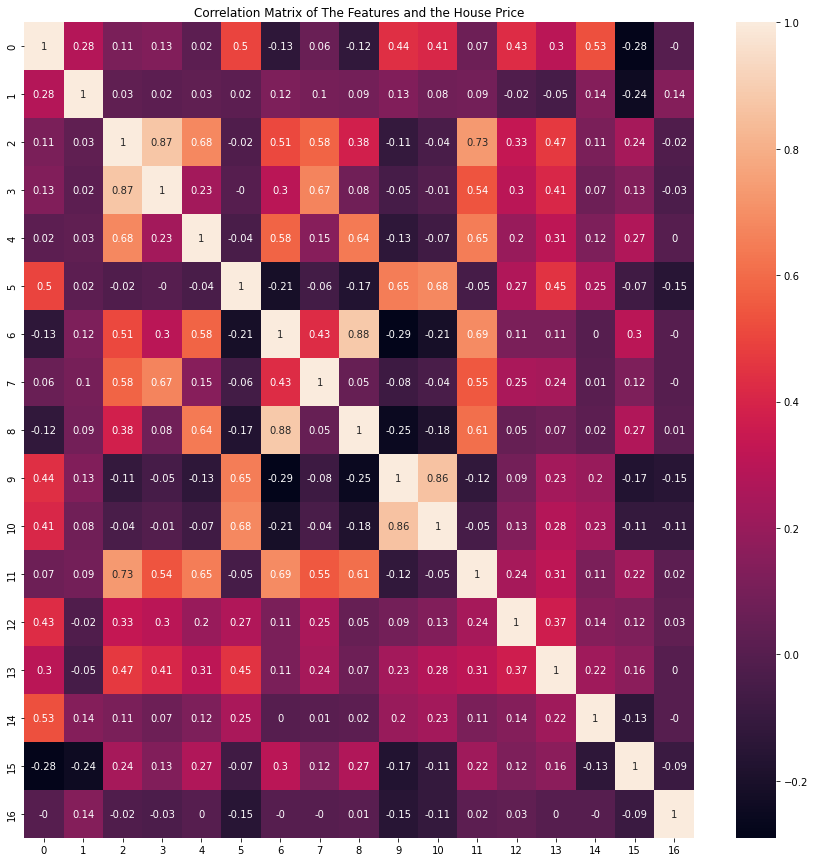

In [55]:
plt.figure(figsize=(15,15))
correlation_matrix = x_normalized.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True) #cmap='Blues_r'
plt.title('Correlation Matrix of The Features and the House Price')
plt.show()

In [56]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=2) 
x_normalized=ICA.fit_transform(x_normalized)
x_normalized = pd.DataFrame(x_normalized)
x_normalized.columns = ['P1', 'P2']

In [58]:
x_normalized.head()

,P1,P2
0,-0.019199,-0.005983
1,0.010997,-0.013268
2,0.007895,0.004978
3,-0.014813,-0.008543
4,-0.005055,0.007607


## Data Visualization and Mining (Performing Customer Segmentation Using Agglomerative Culstering)

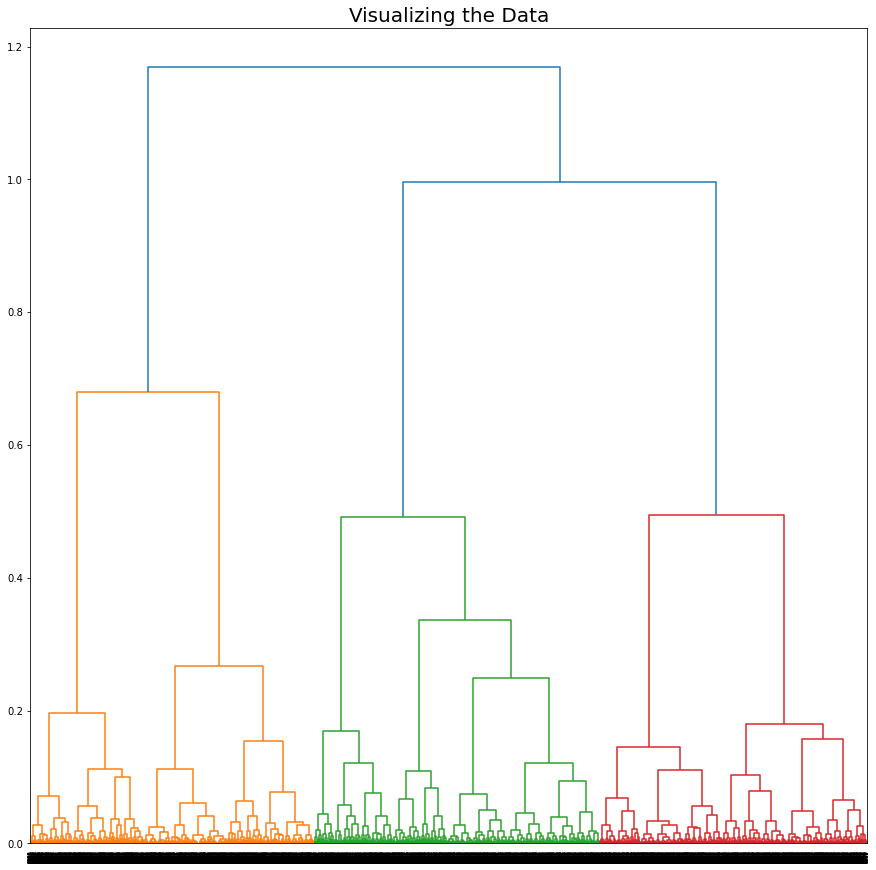

In [59]:
plt.figure(figsize=(15,15))
Dendogram = shc.dendrogram((shc.linkage(x_normalized,method='ward')))
plt.title('Visualizing the Data',fontsize=20)
plt.show()

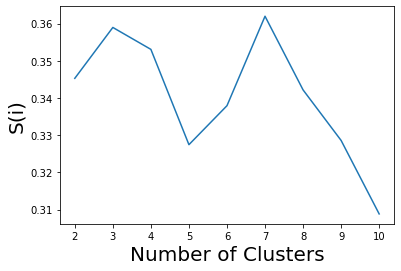

In [60]:
k = [i for i in range(2,11)]
silhoutte_scores = []
for i in range(2,11):
    ac = AgglomerativeClustering(n_clusters=i,linkage='ward')
    silhoutte_scores.append(silhouette_score(x_normalized,ac.fit_predict(x_normalized)))
plt.plot(k,silhoutte_scores)
plt.xlabel('Number of Clusters',fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

### So, from the above graph, we can se that optimal number of clusters will be 7.

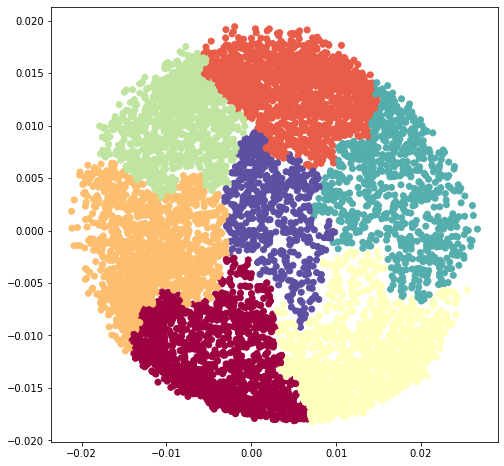

In [62]:
agc = AgglomerativeClustering(n_clusters=7)
plt.figure(figsize=(8,8))
plt.scatter(x_normalized['P1'],x_normalized['P2'],c=agc.fit_predict(x_normalized),cmap ='Spectral')
plt.show()

## References
[1] https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/

[2] https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

[3] https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download

[4] https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

[5] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

[6] https://www.kaggle.com/code/kashish2212/clustering-k-means-yellowbrick-dendrogram